In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from mestrado import datasets
from mestrado.models import FBLEAU
from tqdm.notebook import tqdm

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

# Load data

In [2]:
ce_pairs_list = datasets.load_ce_pairs(a_type=['Binary', 'Categorical'], b_type=['Binary', 'Categorical'])
ce_pairs_sup_list = datasets.load_ce_pairs(a_type=['Binary', 'Categorical'], b_type=['Binary', 'Categorical'], sup=True)

In [3]:
print(len(ce_pairs_list))
print(len(ce_pairs_sup_list))

777
370


- If the estimate is nn, we have to account for class frequency. Need at least 4.
- If the estimate is knn, we dont to have to account for class frequency.

## Experiment with categorical and binary variables

In [4]:
fbleau = FBLEAU()

In [6]:
bayes_risk_list = []

for ce_pair in tqdm(ce_pairs_list):
    computed_risk = {}
    try:
        bayes_risk = fbleau.compute_risk(ce_pair.data, 'a', 'b', estimate='nn')
        computed_risk['sample_id'] = ce_pair.name
        computed_risk['a_type'] = ce_pair.a_type
        computed_risk['b_type'] = ce_pair.b_type
        computed_risk['target'] = ce_pair.target
        computed_risk['details'] = ce_pair.details
        computed_risk['direct_min_estimate'] = bayes_risk['direct']['min-estimate']
        computed_risk['direct_random_guessing'] = bayes_risk['direct']['random-guessing']
        computed_risk['reverse_min_estimate'] = bayes_risk['reverse']['min-estimate']
        computed_risk['reverse_random_guessing'] = bayes_risk['reverse']['random-guessing']
        bayes_risk_list.append(computed_risk)
    except:
        pass

  0%|          | 0/777 [00:00<?, ?it/s]

In [7]:
bayes_risk_df = pd.DataFrame(bayes_risk_list)

In [56]:
bayes_risk_df['direct_gain'] = bayes_risk_df['direct_random_guessing'] - bayes_risk_df['direct_min_estimate']
bayes_risk_df['reverse_gain'] = bayes_risk_df['reverse_random_guessing'] - bayes_risk_df['reverse_min_estimate']

[]

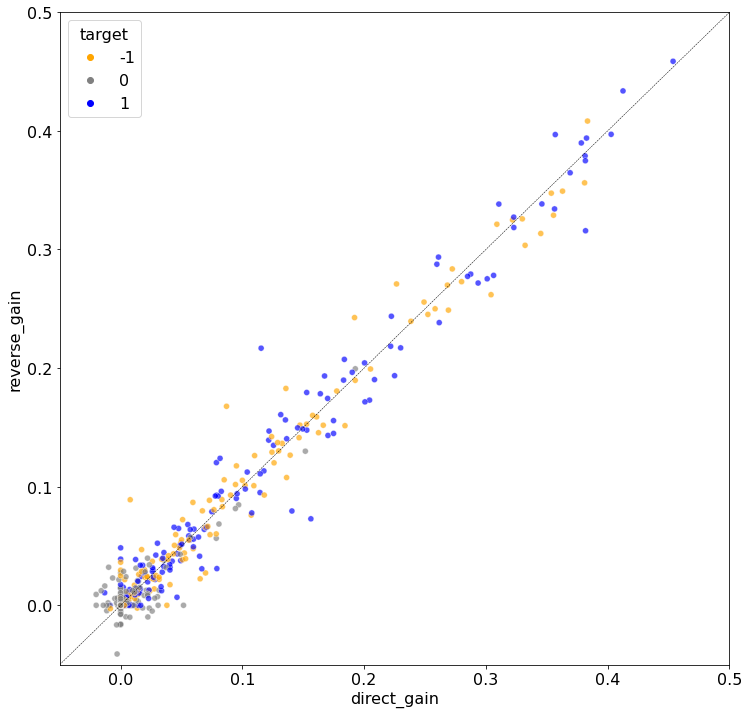

In [58]:
plt.figure(figsize=(12, 12))

palette = {-1:'orange', 1:'blue', 0:'gray'}
sns.scatterplot(data=bayes_risk_df, x='direct_gain', y='reverse_gain', hue='target', alpha=2/3, palette=palette)
plt.plot([-.05, 1], [-.05, 1], color='black', linewidth=0.5, linestyle='dashed')

plt.ylim([-.05, .5])
plt.xlim([-.05, .5])
plt.plot()

## Experiment with real datasets

- TODO:
    ~~- Compare fbleau results with and without dataframe resampling.~~
        - Results are close

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from mestrado import datasets
from mestrado.models import FBLEAU
from tqdm.notebook import tqdm

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

In [2]:
def increase_dataframe_size(df, factor=2):
    df = pd.concat([df] * factor).sample(frac=1)
    
    return pd.concat([df] * factor).sample(frac=1)

In [3]:
fbleau = FBLEAU()

In [4]:
## list of datasets
## TODO: assign correct dtypes for each variable in each dataset in the datasets module.

breast_tumor = increase_dataframe_size(datasets.load_breast_tumor(), 2)
cholesterol = increase_dataframe_size(datasets.load_cholesterol(), 2)
pbc = increase_dataframe_size(datasets.load_pbc(), 6)
pollution = increase_dataframe_size(datasets.load_pollution(), 4)
autompg = increase_dataframe_size(datasets.load_autompg(), 6)
cpu = increase_dataframe_size(datasets.load_cpu(), 4)

databases = {
    'breast_tumor':breast_tumor,
    'cholesterol':cholesterol,
    'pbc':pbc,
    #'pollution':pollution,
    'autompg':autompg,
    'cpu':cpu,
    
}

In [5]:
## Cause effect relationships
## For each dataset, the keys cause the values

databases_ce_pairs = {
    'breast_tumor':{'tumor_size':['inv_nodes', 'deg_malig']},
    'cholesterol':{'chol':['trestbps', 'fbs']},
    'pbc':{'stage':['albumin', 'protime']}, #removed 'bili'
    #'pollution':{'mort':['ovr65']},
    'autompg':{'horsepower':['mpg']},
    'autompg':{'weight':['mpg']},
    'cpu':{'myct':['erp']},
    'cpu':{'mmax':['erp']},
    'cpu':{'cach':['erp']},
}

In [6]:
results = []

for name, df in databases.items():
    print(name)
    for cause, effects in databases_ce_pairs[name].items():
        for effect in effects:
            computed_risk = {}
            try:
                estimate = 'nn'
                if (df[cause].dtype.name != 'category') or (df[effect].dtype.name != 'category'):
                    estimate = 'knn'
                
                bayes_risk = fbleau.compute_risk(df, cause, effect, estimate=estimate)
                
                if bayes_risk != {}:
                    computed_risk['dataset'] = name
                    computed_risk['cause'] = cause
                    computed_risk['effect'] = effect
                    computed_risk['direct_min_estimate'] = bayes_risk['direct']['min-estimate']
                    computed_risk['direct_random_guessing'] = bayes_risk['direct']['random-guessing']
                    computed_risk['reverse_min_estimate'] = bayes_risk['reverse']['min-estimate']
                    computed_risk['reverse_random_guessing'] = bayes_risk['reverse']['random-guessing']
                    print(computed_risk)
                    results.append(computed_risk)
            except Exception as e:
                print(e)
                pass

breast_tumor
Random guessing error: 0.7894736842105263
Estimating leakage measures...
{'dataset': 'breast_tumor', 'cause': 'tumor_size', 'effect': 'inv_nodes', 'direct_min_estimate': 0.7578947368421053, 'direct_random_guessing': 0.7894736842105263, 'reverse_min_estimate': 0.7807017543859649, 'reverse_random_guessing': 0.7894736842105263}
Random guessing error: 0.7894736842105263
Estimating leakage measures...
Random guessing error: 0.7902097902097902
Estimating leakage measures...
Random guessing error: 0.7902097902097902
Estimating leakage measures...
{'dataset': 'breast_tumor', 'cause': 'tumor_size', 'effect': 'deg_malig', 'direct_min_estimate': 0.7762237762237763, 'direct_random_guessing': 0.7902097902097902, 'reverse_min_estimate': 0.7622377622377622, 'reverse_random_guessing': 0.7902097902097902}
cholesterol
Random guessing error: 0.9801980198019802
Estimating leakage measures...
{'dataset': 'cholesterol', 'cause': 'chol', 'effect': 'trestbps', 'direct_min_estimate': 0.91419141914

In [7]:
df_results = pd.DataFrame(results)

In [8]:
df_results.head()

,dataset,cause,effect,direct_min_estimate,direct_random_guessing,reverse_min_estimate,reverse_random_guessing
0,breast_tumor,tumor_size,inv_nodes,0.757895,0.789474,0.780702,0.789474
1,breast_tumor,tumor_size,deg_malig,0.776224,0.790210,0.762238,0.790210
2,cholesterol,chol,trestbps,0.914191,0.980198,0.902640,0.980198
3,cholesterol,chol,fbs,0.975248,0.980198,0.976898,0.980198
4,pbc,stage,albumin,0.369351,0.629187,0.354997,0.629187


In [9]:
df_results['direct_diff_estimate'] = df_results['direct_random_guessing'] - df_results['direct_min_estimate']
df_results['reverse_diff_estimate'] = df_results['reverse_random_guessing'] - df_results['reverse_min_estimate']

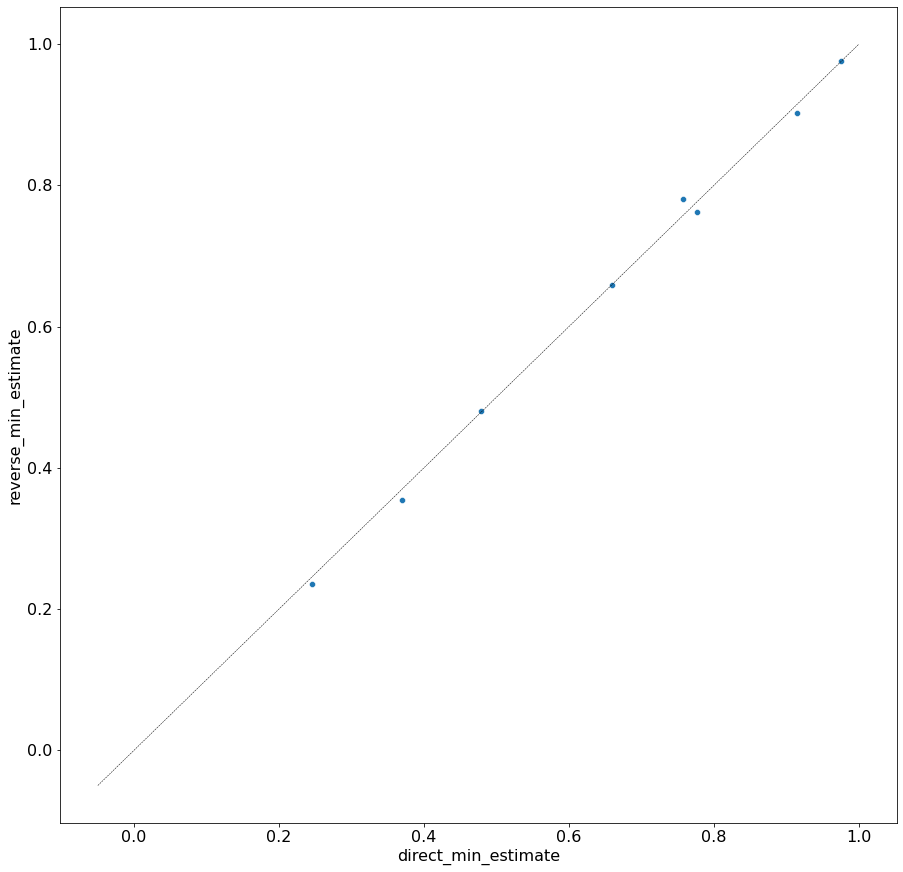

In [12]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_results, x='direct_min_estimate', y='reverse_min_estimate')
plt.plot([-.05, 1], [-.05, 1], color='black', linewidth=0.5, linestyle='dashed')
plt.show()

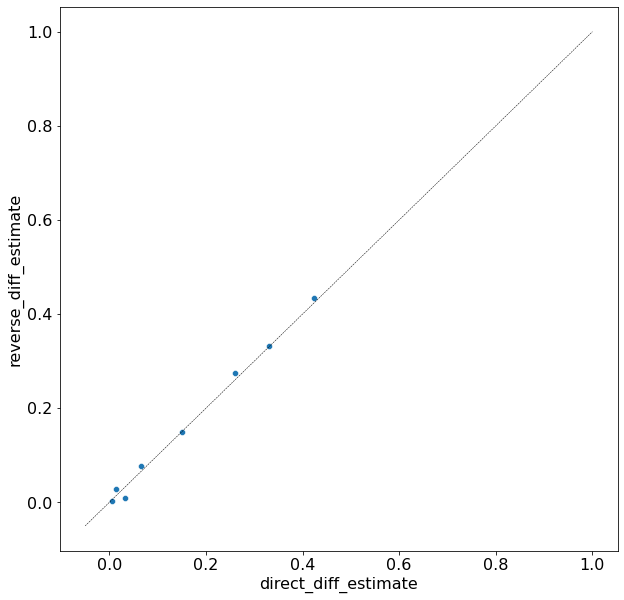

In [11]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_results, x='direct_diff_estimate', y='reverse_diff_estimate')
plt.plot([-.05, 1], [-.05, 1], color='black', linewidth=0.5, linestyle='dashed')
plt.show()